<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Shaik_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.image import imread
from kneed import KneeLocator
sns.set()

In [2]:
# Loading the Training data set provided and dropping the nulls if there exists any
df_train_data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
df_train_data.dropna()
df_train_data.shape

(2223, 101)

In [3]:
# Loading the Test data set provided and dropping the nulls if there exists any
df_test_data = pd.read_csv('/content/ALS_TestingData_78.csv')
df_test_data.dropna()
df_test_data.shape


(78, 131)

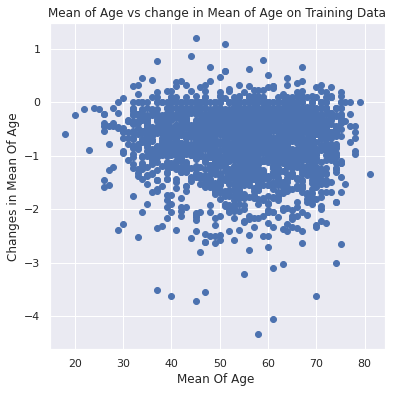

In [4]:
# Visualization of intial raw data i.e traning data
plt.figure(figsize=(6, 6))
plt.scatter(df_train_data['Age_mean'], df_train_data['ALSFRS_slope'])
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

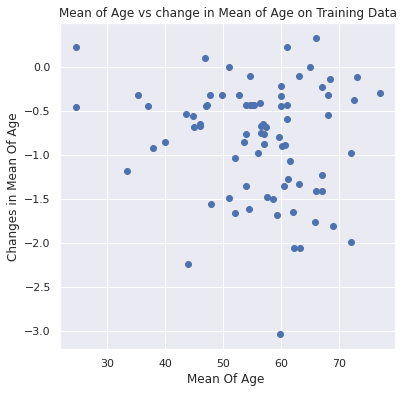

In [5]:
# Visualization of intial raw data i.e on  testing data
plt.figure(figsize=(6, 6))
plt.scatter(df_test_data['Age_mean'], df_test_data['ALSFRS_slope'])
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

In [6]:
#pd.set_option("display.max_rows",df_train_data.shape[0]+1)
#pd.set_option("display.max_rows",df_test_data.shape[0]+1)
df_train_data.isnull().sum()
df_test_data.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

In [7]:
# Preparing the data for the analysis
df_standard = StandardScaler().fit_transform(df_train_data)

In [8]:
#Applying K-Means to calculate centriods of clusters and inertia
k_means_data = KMeans(n_clusters=2, random_state=39, max_iter=100 )
k_means_data.fit(df_standard)
centroids_data = k_means_data.cluster_centers_
inertia_data = k_means_data.inertia_
print('SSE value of the analysis:', inertia_data)

SSE value of the analysis: 207788.85417228256


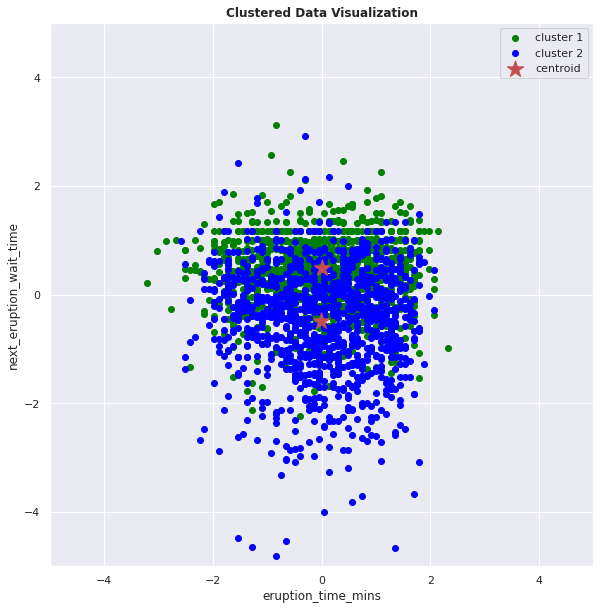

In [11]:
# Visualizing the plot with k-means analysed centroids
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_standard[k_means_data.labels_ == 0, 1], df_standard[k_means_data.labels_ == 0, 6],
            c='green', label='cluster 1')
plt.scatter(df_standard[k_means_data.labels_ == 1, 1], df_standard[k_means_data.labels_ == 1, 6],
            c='blue', label='cluster 2')
plt.scatter(centroids_data[:, 1], centroids_data[:, 6], marker='*', s=300,
            c='r', label='centroid')
# Applying the parameters of plot for the visualization graph
plt.legend()
plt.xlabel('eruption_time_mins')
plt.ylabel('next_eruption_wait_time')
plt.title('Clustered Data Visualization', fontweight='bold')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ax.set_aspect('equal')

In [21]:
# Computing Correlation values on the training data
corrrelation_train = df_train_data.corrwith(df_train_data['ALSFRS_slope'])
correlation_data_train = pd.DataFrame(corrrelation_train, columns = ['score'])

In [22]:
# printing positively Correlated with ALSFRS_slope values
print('ALSFRS_slope positively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] >= 0.2])

ALSFRS_slope positively correlated: 
                        score
ALSFRS_slope         1.000000
ALSFRS_Total_median  0.247250
ALSFRS_Total_min     0.601810
hands_min            0.424107
leg_min              0.348967
mouth_median         0.244704
mouth_min            0.435538
respiratory_min      0.380749
trunk_min            0.488530


In [23]:
# printing negetively Correlated with ALSFRS_slope values
print('ALSFRS_slope negetively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] <= -0.2])

ALSFRS_slope negetively correlated: 
                       score
Albumin_range      -0.226123
ALSFRS_Total_range -0.819305
hands_range        -0.632350
Hemoglobin_range   -0.209774
leg_range          -0.584507
mouth_range        -0.553194
onset_delta_mean   -0.324307
pulse_range        -0.236961
respiratory_range  -0.432878
trunk_range        -0.686407


In [29]:
## Chosing K value for clustering using elbow method
sse_list = []
cluster_list = list(range(1, 10))
for k in cluster_list:
    km_data = KMeans(n_clusters=k)
    km_data.fit(df_standard)
    sse_list.append(km_data.inertia_)

<Figure size 792x792 with 0 Axes>

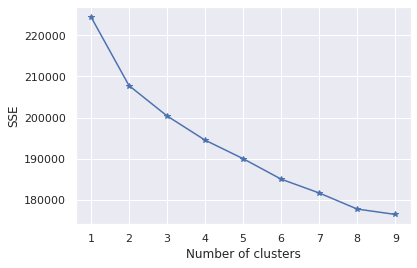

<Figure size 792x792 with 0 Axes>

In [30]:
# Visualization plot for K-Means Number of clusters vs SSE
plt.plot(cluster_list, sse_list, marker = '*')
plt.xlabel('Number of clusters')
plt.ylabel('SSE');
plt.figure(figsize=(11, 11))

In [36]:
kneeLocator_elbow = KneeLocator(range(1, 10), sse_list, curve="convex", direction="decreasing")
print("Values of KneeLocation elbows : ",kneeLocator_elbow.elbow)

Values of KneeLocation elbows 3


In [41]:
#Calculating Silhouette Coefficient values
sil_coef_list=[]
for clust in range (2,11):
  kmeans_silhouette = KMeans(n_clusters = clust)
  kmeans_silhouette.fit(df_standard)
  sil_cof_score = silhouette_score(df_standard,kmeans_silhouette.labels_ )
  sil_coef_list.append(sil_cof_score)

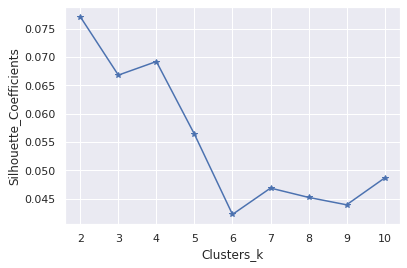

<Figure size 792x792 with 0 Axes>

In [40]:
# Visualization of the clusters drawn to the silhouette coefficients
x = []
for item in range(2, 11):
  x.append(item)
y=sil_coef_list
plt.plot(x, y, marker='*')
plt.xticks(x)
plt.xlabel('Clusters_k')
plt.ylabel('Silhouette_Coefficients')
plt.figure(figsize=(11, 11))
plt.show()

In [43]:
# Based on the two method depicted above the value of K selected is 3 for the analysis
k_accurate = KMeans(n_clusters = 3)
k_accurate.fit(df_standard)
pred = k_accurate.predict(df_standard)

In [45]:
# Calculated centroids for the clusters
centroids_clusters  = k_accurate.cluster_centers_
print("Calculated centroids for the clusters : ",centroids_clusters)
print(centroids_clusters)

Calculated centroids for the clusters :  [[-4.33650215e-02 -2.13141969e-01 -4.15358093e-02 -6.22320613e-02
  -9.06922076e-02 -1.91060625e-03  2.91676437e-02 -9.43449553e-01
  -8.89686370e-01 -6.46438568e-01  5.91342613e-03 -3.67248029e-02
  -7.71047424e-02 -1.56193924e-01 -2.76781531e-02 -7.34087715e-02
  -1.98005550e-01 -2.59211896e-01 -4.58245800e-02 -2.55897501e-01
  -3.35873082e-01 -2.96089240e-01 -1.14958306e-01 -1.32132649e-01
  -2.48131371e-01 -2.75710396e-01 -4.48600984e-02  1.08704346e-01
   2.76304022e-02 -2.89892576e-03 -2.91827172e-03 -3.16762001e-02
  -5.12486283e-02 -8.00370182e-02 -5.92501740e-02  1.08163206e-01
   1.70355807e-01  4.15036654e-02  2.12145403e-02  1.01432502e-01
   9.74243828e-02  5.43787856e-02 -7.71945690e-02 -4.18564188e-01
  -4.65189909e-01 -4.54863795e-01 -5.11447934e-02 -1.00339911e-01
   7.05573119e-02  4.35474548e-02 -3.93558519e-02  2.07227559e-02
  -8.49091174e-01 -8.77175223e-01 -7.71248519e-01  8.10496864e-02
   2.66741792e-02  2.08762297e-02  

In [46]:
# Centroids to interpret the clusters
centroids_clusters  = k_accurate.cluster_centers_
centroids_df = pd.DataFrame(centroids_clusters, columns = df_train_data.columns)
print('\t'*5, ' The Table of Centroids')
centroids_df

					  The Table of Centroids


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,-0.043365,-0.213142,-0.041536,-0.062232,-0.090692,-0.001911,0.029168,-0.943450,-0.889686,-0.646439,0.005913,-0.036725,-0.077105,-0.156194,-0.027678,-0.073409,-0.198006,-0.259212,-0.045825,-0.255898,-0.335873,-0.296089,-0.114958,-0.132133,-0.248131,-0.27571,-0.044860,0.108704,0.027630,-0.002899,-0.002918,-0.031676,-0.051249,-0.080037,-0.059250,0.108163,0.170356,0.041504,0.021215,0.101433,...,-0.006742,-0.055085,0.016790,-0.691503,-0.691469,-0.608319,-0.181174,0.050630,-0.009125,-0.056338,0.079942,-0.320131,0.265820,0.034432,0.072239,0.026789,-0.069430,-0.183691,-0.153224,-0.064182,0.089297,0.086072,0.057868,-0.051194,-0.042668,-0.144183,-0.144129,0.095506,0.022379,0.016207,-0.007340,-0.069291,-0.042532,-0.978204,-0.979447,-0.800401,0.010464,0.058375,-0.009997,0.036221
1,-0.026526,0.304009,-0.144203,-0.223088,-0.288870,0.416170,-1.084774,0.097895,-0.218876,-0.757721,1.221951,0.055502,-0.084939,-0.092339,0.255260,-0.007029,-0.040508,-0.036615,0.192980,0.336379,0.346803,0.320245,0.516016,0.079538,0.107727,0.08342,0.414726,-0.100075,-0.104314,-0.092691,0.324786,0.036953,-0.030742,-0.090128,0.465388,-0.051833,-0.042685,0.023945,0.147509,-0.316825,...,-0.226521,-0.262459,0.435534,0.319995,0.094209,-0.306858,0.930101,-0.672723,-0.748611,-0.927894,0.935037,0.481993,-0.585845,0.311211,0.168940,0.127221,0.060334,0.113260,0.057422,0.250284,0.394842,0.316750,0.247984,0.548656,-0.269300,-0.448399,-0.692910,0.728180,-0.107399,-0.112584,-0.157592,0.500766,-0.027070,0.336414,0.121141,-0.374016,0.989962,0.112799,0.123118,-0.008835
2,0.046064,0.006123,0.104363,0.159931,0.214693,-0.209609,0.528169,0.659861,0.780068,0.870394,-0.624115,-0.000528,0.101059,0.164289,-0.108631,0.058770,0.169449,0.213504,-0.063401,0.021861,0.076719,0.060268,-0.175226,0.059033,0.131973,0.16504,-0.176577,-0.031000,0.032120,0.049185,-0.162509,0.005082,0.054130,0.105896,-0.191447,-0.055057,-0.106467,-0.043355,-0.090758,0.084386,...,0.119943,0.174522,-0.233492,0.357759,0.472233,0.613088,-0.335418,0.303072,0.386494,0.512916,-0.534289,-0.003677,0.097185,-0.183713,-0.139998,-0.084662,0.021617,0.080706,0.086110,-0.078655,-0.267384,-0.225357,-0.169275,-0.239732,0.168653,0.335820,0.459774,-0.441094,0.037634,0.044904,0.085437,-0.201836,0.045713,0.565041,0.675144,0.791596,-0.509893,-0.101102,-0.054917,-0.022759


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

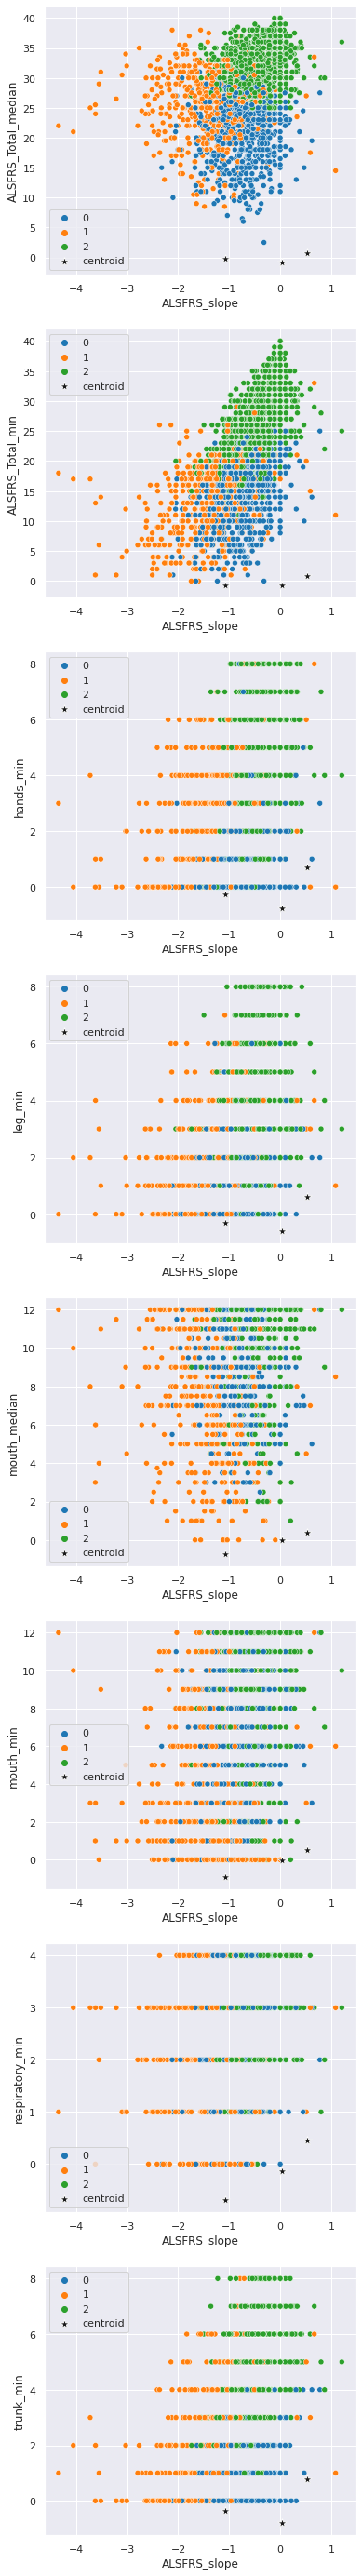

In [57]:
# Visualizing the dataplot for different clusters
df_train_data['cluster'] = pred

labelList = ['ALSFRS_Total_median','ALSFRS_Total_min', 'hands_min',  'leg_min', 'mouth_median', 'mouth_min', 'respiratory_min', 'trunk_min']

fig, ax = plt.subplots(8,1,figsize=(6,50))
for item,yVal in enumerate(labelList):
  sns.scatterplot ('ALSFRS_slope', yVal, hue = 'cluster', palette= 'tab10', data = df_train_data, ax=ax[item])
  sns.scatterplot ('ALSFRS_slope' , yVal,   color='.1', s = 100, marker="*",label = 'centroid', data = centroids_df, ax=ax[item])

In [64]:
# Validating the results using Testing data
df_std_test = StandardScaler().fit_transform(df_test_data)

In [65]:
k_means_test= KMeans(n_clusters = 3)
k_means_test.fit(df_std_test)
test_pred = k_means_test.predict(df_std_test)

In [69]:
#Validating the values of centroids
centr  = k_means_test.cluster_centers_
centroids_df = pd.DataFrame(centr, columns = df_test_data.columns)
centroids_df = centroids_df['ALSFRS_slope']
print('The values of Centroids')
centroids_df

The values of Centroids


0    0.240473
1   -0.242536
2    0.280714
Name: ALSFRS_slope, dtype: float64